## Task 1 
Classifying the radio signals from deep space using Keras from the SETI Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/dataset.zip"

Archive:  /content/drive/MyDrive/dataset.zip
mapname:  conversion of  failed
replace train/images.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: '
error:  invalid response [']
replace train/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace valid/labels (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace valid/images (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Load & process data

In [3]:
import pandas as pd

train_images = pd.read_csv("/content/train/images.csv", header=None)
train_labels = pd.read_csv("/content/train/labels.csv", header=None)

valid_images = pd.read_csv("/content/valid/images (1).csv", header=None)
valid_labels = pd.read_csv("/content/valid/labels (1).csv", header=None)

In [4]:
print("There are", train_images.shape[0], "training images")
print("There are", valid_images.shape[0], "validation images")

There are 3200 training images
There are 800 validation images


In [5]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [6]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [7]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Columns: 8192 entries, 0 to 8191
dtypes: float64(8192)
memory usage: 200.0 MB


In [8]:
train_images.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
8187    0
8188    0
8189    0
8190    0
8191    0
Length: 8192, dtype: int64

In [9]:
import numpy as np

X_train = np.array(train_images.values).reshape(len(train_images), 64, 128, 1)
X_val = np.array(valid_images.values).reshape(len(valid_images), 64, 128, 1)
print(X_train.shape)
print(X_val.shape)

(3200, 64, 128, 1)
(800, 64, 128, 1)


In [10]:
y_train = np.array(train_labels.values)
y_val = np.array(valid_labels.values)
print(y_train.shape)
print(y_val.shape)

(3200, 4)
(800, 4)


### Visualizing the Dataset

In [11]:
labels = ["squiggle", "narrowband", "narrowbanddrd", "noise"]
labels_map = {i:label for i, label in enumerate(labels)}
labels_map

{0: 'squiggle', 1: 'narrowband', 2: 'narrowbanddrd', 3: 'noise'}

In [12]:
from collections import Counter
import random

train_labels = [labels_map[np.argmax(y_train[i])] for i in range(len(y_train))]
dict(Counter(train_labels))

{'squiggle': 800, 'narrowbanddrd': 800, 'noise': 800, 'narrowband': 800}

The dataset has perfectly balanced classes.

In [13]:
n = 5

In [14]:
narrow_band = [indx for indx, val in enumerate(train_labels) if val=="narrowband"]
sample_nb = random.sample(narrow_band, n)
sample_nb

[2638, 2579, 3054, 3165, 3066]

In [15]:
narrowbanddrd = [indx for indx, val in enumerate(train_labels) if val=="narrowbanddrd"]
sample_nbdrd = random.sample(narrowbanddrd, n)
sample_nbdrd

[1170, 1410, 1539, 966, 1501]

In [16]:
noise = [indx for indx, val in enumerate(train_labels) if val=="noise"]
sample_noise = random.sample(noise, n)
sample_noise

[2010, 1622, 2139, 1603, 2099]

In [17]:
squiggle = [indx for indx, val in enumerate(train_labels) if val=="squiggle"]
sample_squiggle = random.sample(squiggle, n)
sample_squiggle

[553, 520, 726, 707, 439]

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot(X_train, y_train, indx_ls):
  for indx in indx_ls:
    plt.imshow(np.squeeze(X_train[indx]), interpolation='nearest')
    plt.title(labels_map[np.argmax(y_train[indx])])
    plt.xticks([])
    plt.yticks([])
    plt.show()

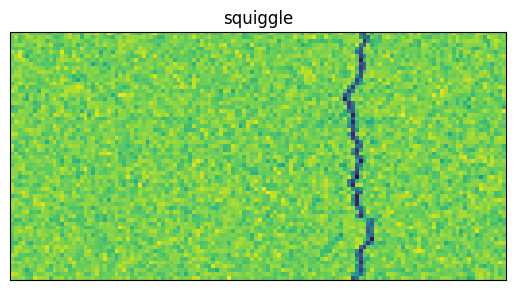

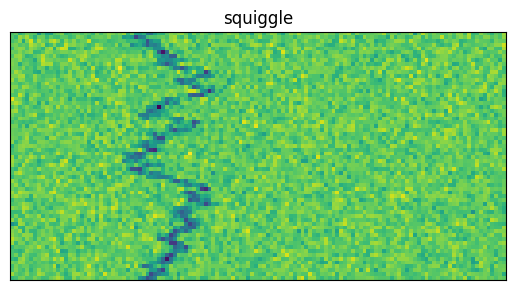

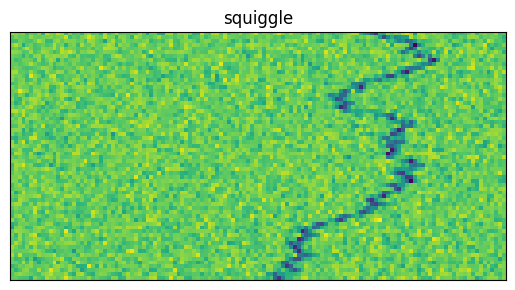

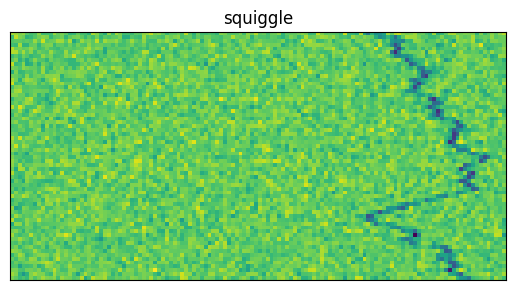

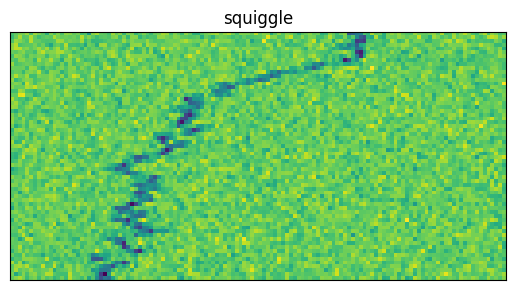

In [19]:
plot(X_train, y_train, sample_squiggle)

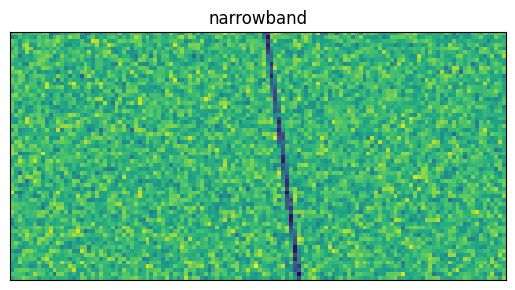

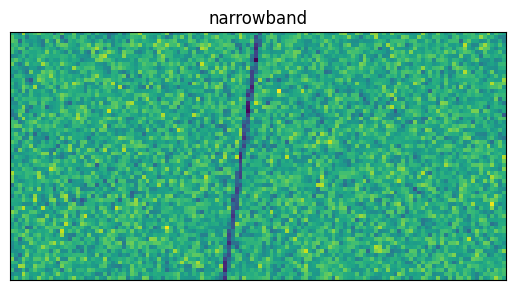

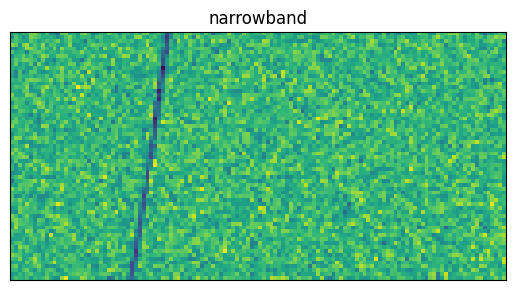

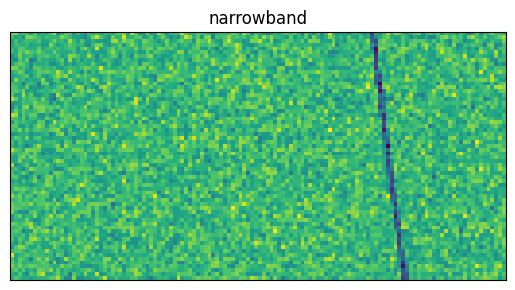

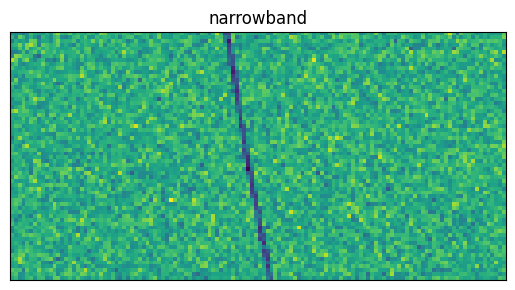

In [20]:
plot(X_train, y_train, sample_nb)

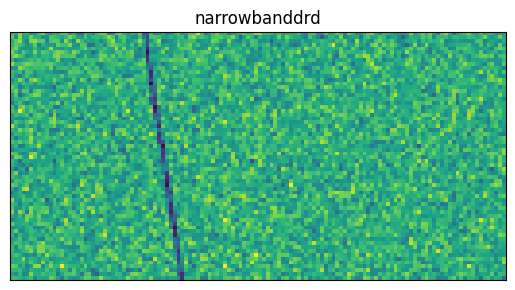

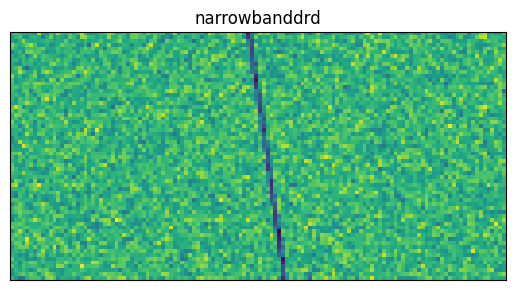

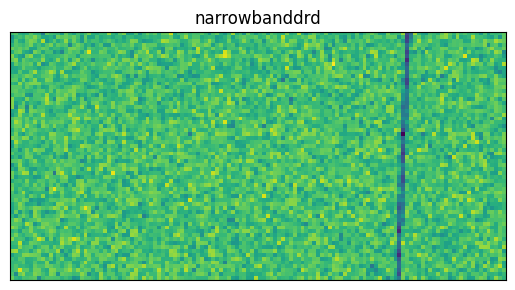

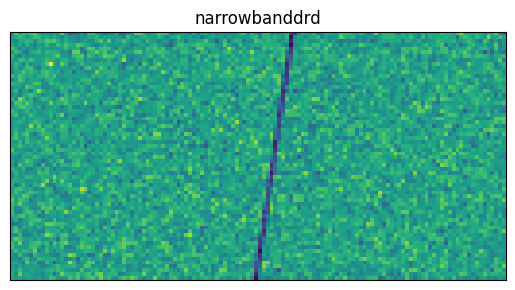

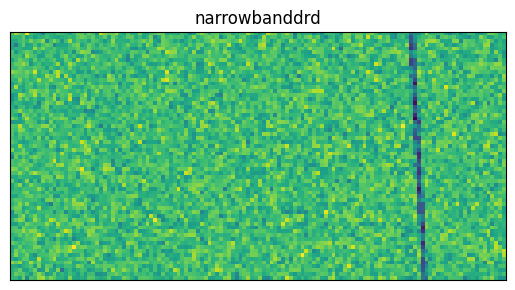

In [21]:
plot(X_train, y_train, sample_nbdrd)

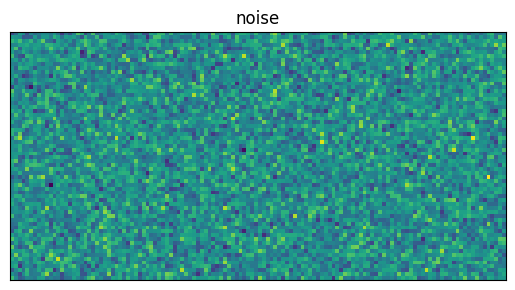

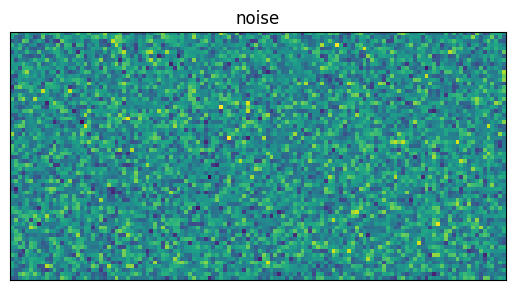

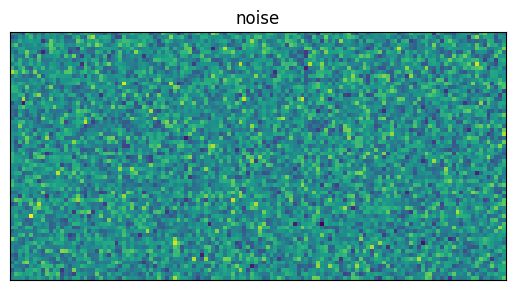

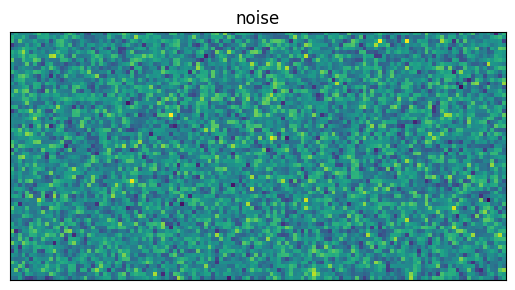

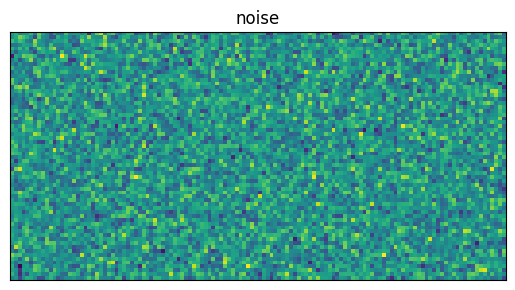

In [22]:
plot(X_train, y_train, sample_noise)

### Data Pipelines and Image Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
train_datagen.fit(X_train)

In [24]:
val_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range=0.3, vertical_flip=True)
val_datagen.fit(X_val)

### Create Model

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [26]:
model = Sequential()

model.add(Conv2D(64 , (5 , 5) , padding = "same" , input_shape = (64 , 128 , 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(128 , (5 , 5) , padding = "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(4 , activation="softmax"))

### Compile & Train Model

In [27]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate = initial_learning_rate,
                decay_steps = 5,
                decay_rate = 0.96,
                staircase = True
)
optimizers = Adam(learning_rate = lr_schedule)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 64)       1664      
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 64)      256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 128, 64)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        1

In [28]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [checkpoint]

batch_size = 32

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_val)//batch_size,
    epochs=12,
    callbacks=callbacks)

Epoch 1/12
100/100 [==============================] - 324s 3s/step - loss: 0.7322 - accuracy: 0.6566 - val_loss: 2.6072 - val_accuracy: 0.2500
Epoch 2/12
100/100 [==============================] - 317s 3s/step - loss: 0.5507 - accuracy: 0.7009 - val_loss: 3.0042 - val_accuracy: 0.2500
Epoch 3/12
100/100 [==============================] - 323s 3s/step - loss: 0.4278 - accuracy: 0.7397 - val_loss: 2.6843 - val_accuracy: 0.2562
Epoch 4/12
100/100 [==============================] - 313s 3s/step - loss: 0.4098 - accuracy: 0.7353 - val_loss: 1.8657 - val_accuracy: 0.5038
Epoch 5/12
100/100 [==============================] - 312s 3s/step - loss: 0.4185 - accuracy: 0.7356 - val_loss: 1.8595 - val_accuracy: 0.4988
Epoch 6/12
100/100 [==============================] - 316s 3s/step - loss: 0.4034 - accuracy: 0.7581 - val_loss: 1.6566 - val_accuracy: 0.5000
Epoch 7/12
100/100 [==============================] - 315s 3s/step - loss: 0.4126 - accuracy: 0.7378 - val_loss: 1.1218 - val_accuracy: 0.5337

### Plotting loss and accuracy

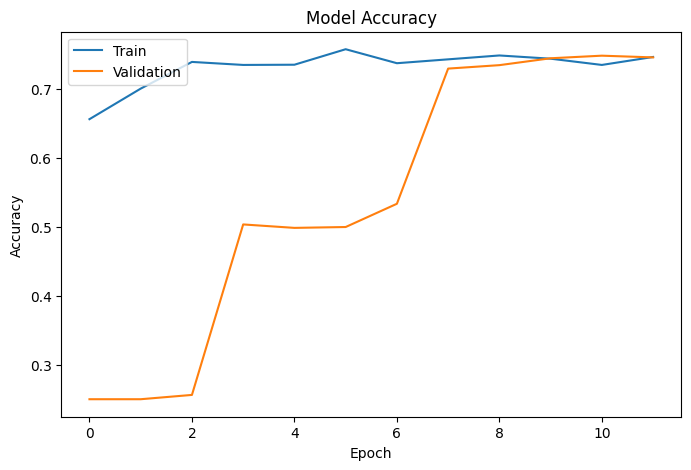

In [29]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

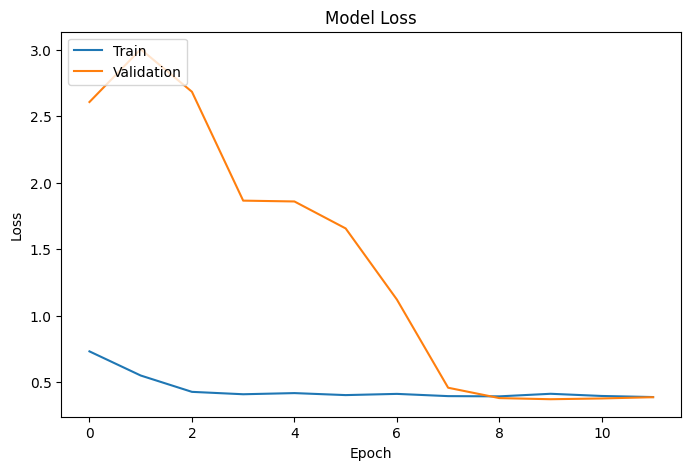

In [30]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.show()

### Evaluating Model Performance

In [31]:
model.evaluate(X_val, y_val)

25/25 [==============================] - 16s 662ms/step - loss: 1.7740 - accuracy: 0.5063


[1.7739667892456055, 0.5062500238418579]

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(X_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 16s 657ms/step
              precision    recall  f1-score   support

           0       0.35      1.00      0.51       200
           1       0.48      0.07      0.13       200
           2       0.00      0.00      0.00       200
           3       1.00      0.95      0.97       200

    accuracy                           0.51       800
   macro avg       0.46      0.51      0.40       800
weighted avg       0.46      0.51      0.40       800

Classification accuracy: 0.506250


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Considering the fact that the image size of the training dataset and sample count per class was very small, I think we have managed to achieve a good model performance.

## Task 2

Detect car and license plate using HaarCascade Files.

In [38]:
import cv2

import numpy as np

# load cascade file
car_cascade = cv2.CascadeClassifier('haarcascade_car.xml')

# open the video file
video = cv2.VideoCapture('video1.mp4')

while video.isOpened():
    # read the video file frame
    ret, frame= video.read()
    if (type(frame) == type(None)):
        break
    # resize the frame
    frame= cv2.resize(frame, None, fx=0.15, fy=0.15, interpolation= cv2.INTER_LINEAR)
    # convert it from BRG to GRAY
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # detecting the cars in a frame and saving their bounding box coordinates in "cars" variable
    cars = car_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=4)
    # iterating over "cars" to draw the bounding boxes on the frame
    for (x,y,w,h) in cars:
        cv2.rectangle(frame,(x,y),(x+w,y+h), (0,255,255), 2)
        cv2.imshow('Output', frame)
    # press enter to escape/exit
    if cv2.waitKey(1) == 13:
        break


video.release()
cv2.destroyAllWindows()

### Ouput Frames (Detect Cars)

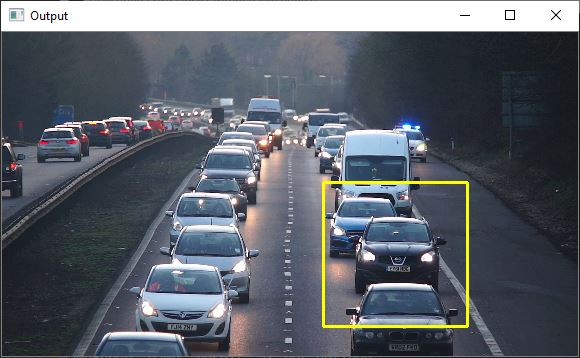

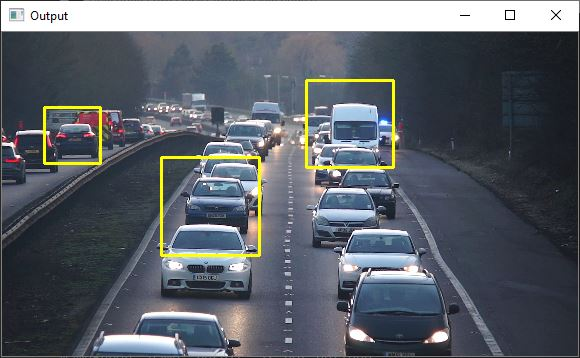

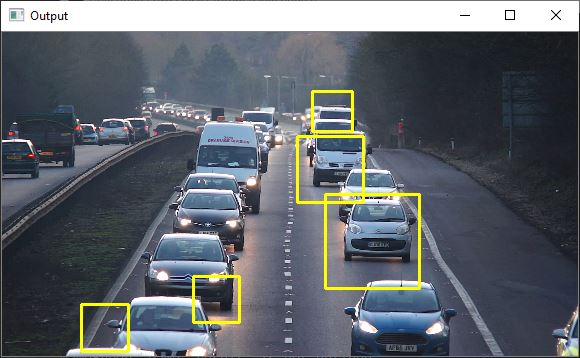

### Ouput Frames (Detect License Plate)

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# load cascade file
carplate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
# open image
img = cv2.imread('img2.jpg')
# detect license plate using cascade file
carplates = carplate_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5) 
# drawing bounding boxes on the image
for x,y,w,h in carplates: 
	cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 5)

# reshaping the image and displaying it
scale_factor = 1.2
width = int(img.shape[1] * scale_factor / 100)
height = int(img.shape[0] * scale_factor / 100)
dim = (width, height)
cv2.imshow('Output', img)
cv2.imwrite('op2.jpg', img)
cv2.waitKey(0)

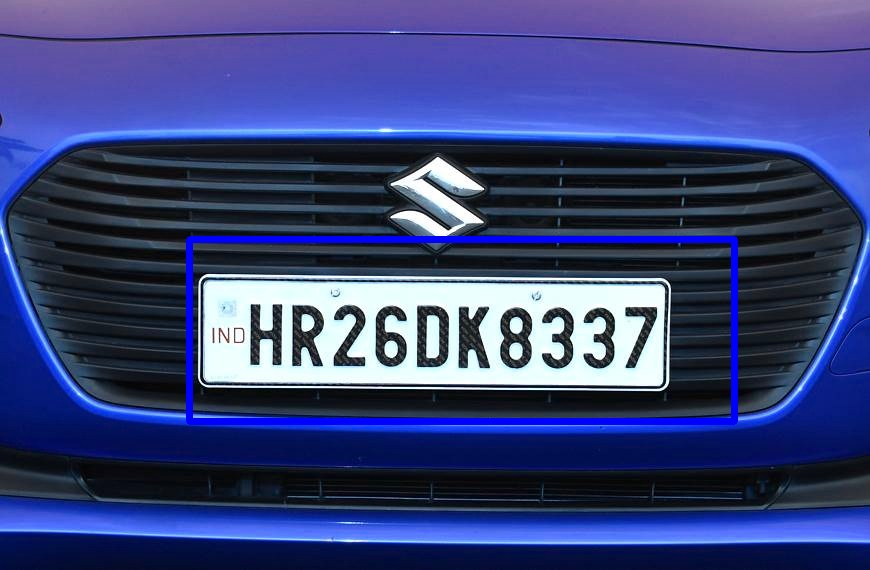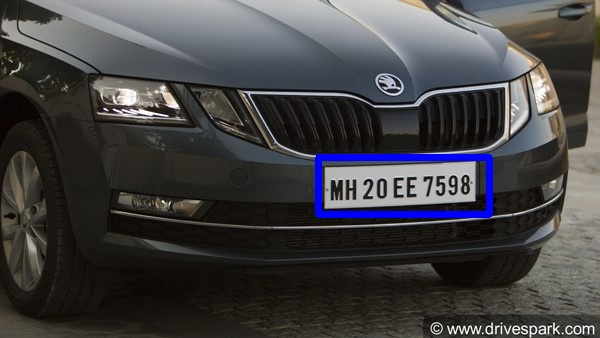